## Simulation Test

First Let's Generate Some Trajectories / Commands 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.style.use('ggplot')
%matplotlib inline
data_path = '/home/alsaibie/UWSim/src/underwater_simulation/dynamics_stack/unit_sim_nonreal/Install/data/'
fontP = FontProperties()

plot_dynamics = True
plot_dynamic_param = True
plot_sensor = True
plot_pos_control = True
plot_att_control = True
plot_errors = True
skip_resample = 2

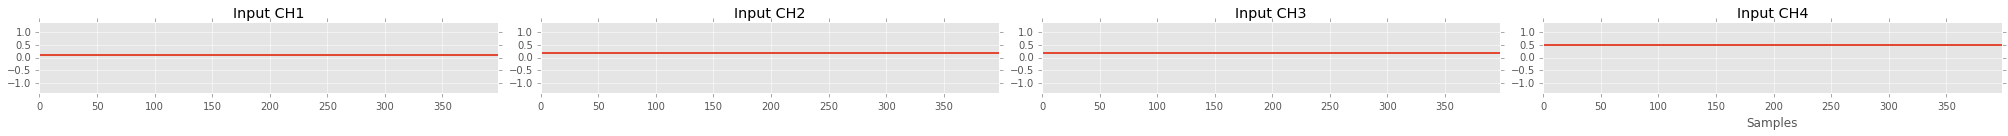

In [708]:
# Will generate a 4 channel output between -1 and 1
# !{'./gen_commands_motors.py'}
!{'./gen_commands_trpy.py'}
input_data = pd.read_csv(data_path + 'generic_input.txt', skipinitialspace=True)
#Let's Plot
fig, axes = plt.subplots(figsize=(28,2), nrows=1, ncols=4)
ax = input_data.loc[::skip_resample, input_data.columns[0]].plot(ax=axes[0], title = "Input CH1", lw=2, ylim=[-1.4,1.4])
ax = input_data.loc[::skip_resample, input_data.columns[1]].plot(ax=axes[1], title = "Input CH2", lw=2, ylim=[-1.4,1.4], sharex=ax)
ax = input_data.loc[::skip_resample, input_data.columns[2]].plot(ax=axes[2], title = "Input CH3", lw=2, ylim=[-1.4,1.4], sharex=ax)
ax = input_data.loc[::skip_resample, input_data.columns[3]].plot(ax=axes[3], title = "Input CH4", lw=2, ylim=[-1.4,1.4], sharex=ax)
ax.set_xlabel('Samples')
fig.tight_layout()

In [709]:
!{'../dynamics_stack/unit_sim_nonreal/Install/bin/unit_sim_nonreal'}

Mass Matrix
   0.359772           0           0           0           0           0
          0    0.383108           0           0           0           0
          0           0    0.383108           0           0           0
          0           0           0 0.000408576           0           0
          0           0           0           0 0.000337109           0
          0           0           0           0           0 0.000545101
B Matrix
    1     1     1     1     0     0     0     0
    0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0
    0     0     0     0     1     1    -1    -1
-0.03  0.03 -0.03  0.03     0     0     0     0
-0.03  0.03  0.03 -0.03     0     0     0     0
 Unity Dvv Vector: 
  1.06571
  2.22663
   3.5104
0.0005323
0.0005323
0.0005323
 Unity Cv Matrix: 
           0            0            0           -0     0.383108    -0.383108
           0            0            0    -0.383108           -0     0.359772
    

,p.x,p.y,p.z,att.x,att.y,att.z,attq.w,attq.x,attq.y,attq.z,...,v.yaw,pdot.x,pdot.y,pdot.z,vdot.x,vdot.y,vdot.z,vdot.r,vdot.p,vdot.yaw
Time (ms),,,,,,,,,,,,,,,,,,,,,
3965,-1,1,4,2.45197,0,0,0.338018,0.941140,0,0,...,0,0,0,0,0,0,0,-0.074350,0,0
3975,-1,1,4,2.45269,0,0,0.337679,0.941261,0,0,...,0,0,0,0,0,0,0,-0.737249,0,0
3985,-1,1,4,2.45332,0,0,0.337382,0.941368,0,0,...,0,0,0,0,0,0,0,-1.929590,0,0
3995,-1,1,4,2.45375,0,0,0.337183,0.941439,0,0,...,0,0,0,0,0,0,0,-3.494410,0,0
4005,-1,1,4,2.45380,0,0,0.337158,0.941448,0,0,...,0,0,0,0,0,0,0,-5.308890,0,0


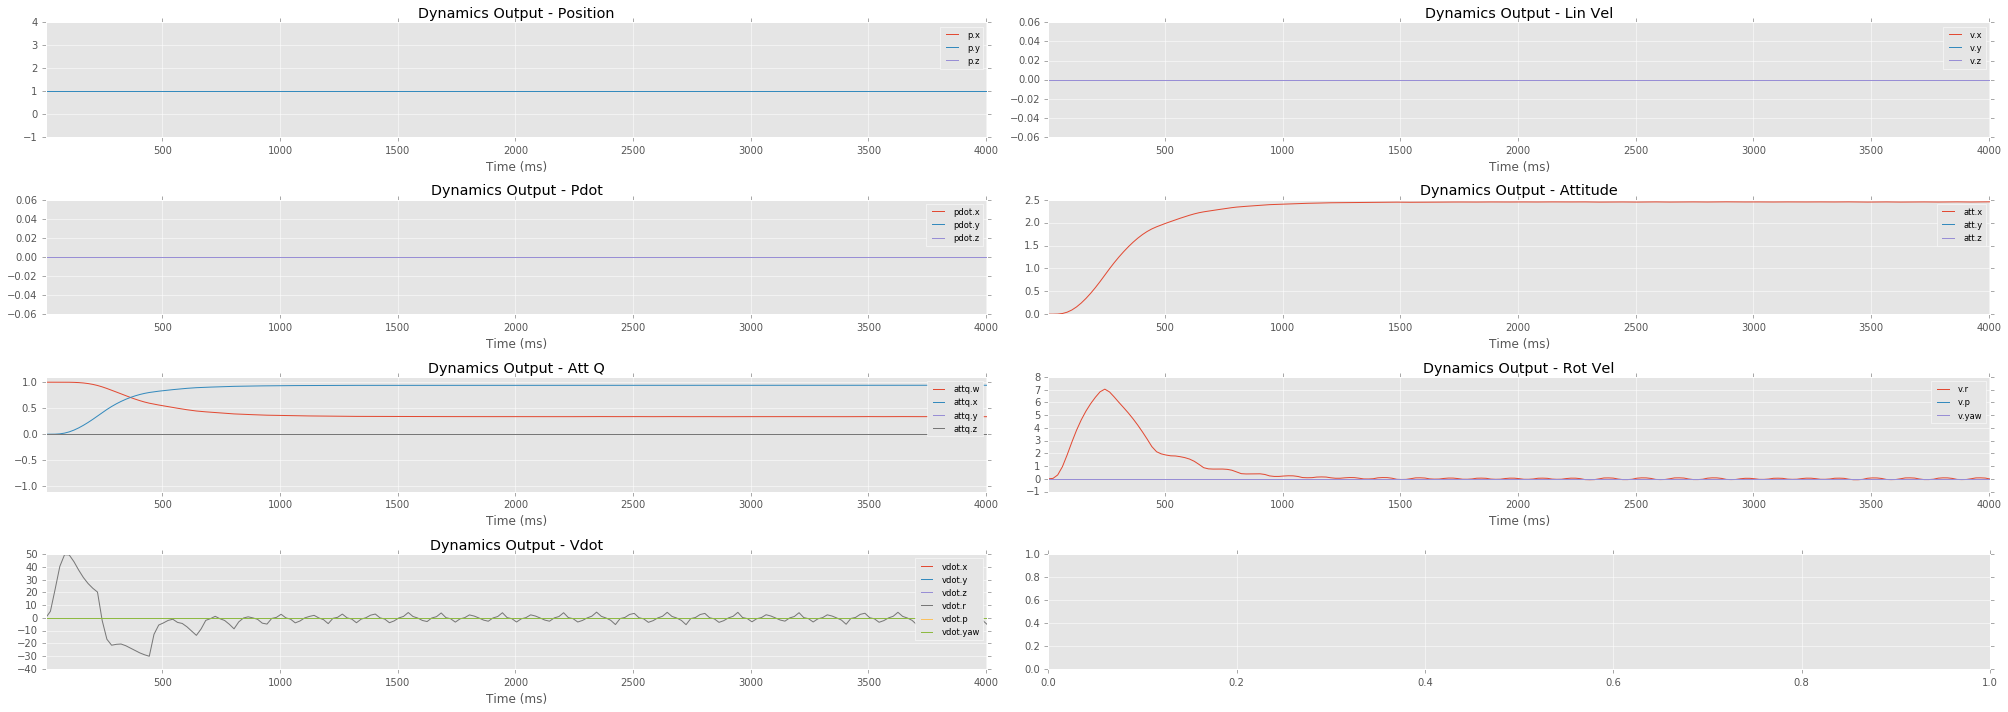

In [3]:
dynamics_data = pd.read_csv(data_path + 'dynamics_output.txt', skipinitialspace=True).loc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
if plot_dynamics:
    display(dynamics_data.tail())
    fig, axes = plt.subplots(figsize=(28,10), nrows=4, ncols=2)

    fontP.set_size('small')
    ax_pos = dynamics_data.loc[::skip_resample, 'p.x':'p.z'].plot(ax=axes[0,0], title = 'Dynamics Output - Position').legend(loc=1, prop=fontP)
    ax_vel = dynamics_data.loc[::skip_resample, 'v.x':'v.z'].plot(ax=axes[0,1], title = 'Dynamics Output - Lin Vel').legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'pdot.x':'pdot.z'].plot(ax=axes[1,0], title = 'Dynamics Output - Pdot').legend(loc=1, prop=fontP)

    ax_att = dynamics_data.loc[::skip_resample, 'att.x':'att.z'].plot(ax=axes[1,1], title = 'Dynamics Output - Attitude').legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'attq.w':'attq.z'].plot(ax=axes[2,0], title = 'Dynamics Output - Att Q', ylim=[-1.1,1.1]).legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'v.r':'v.yaw'].plot(ax=axes[2,1], title = 'Dynamics Output - Rot Vel').legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'vdot.x':'vdot.yaw'].plot(ax=axes[3,0], title = 'Dynamics Output - Vdot').legend(loc=1, prop=fontP)
    fig.tight_layout()

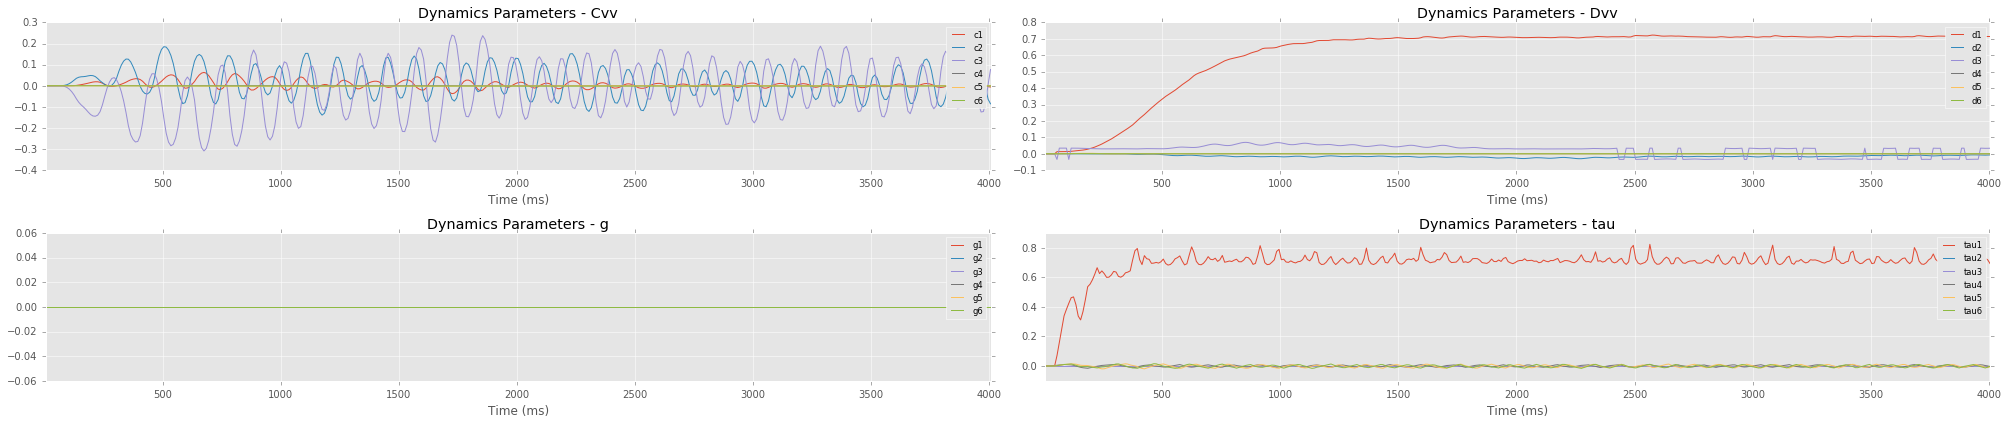

In [711]:
dynamics_param_mv = pd.read_csv(data_path + 'dynamics_param_output_Mv.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
dynamics_param_cv = pd.read_csv(data_path + 'dynamics_param_output_Cv.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
dynamics_param_dv = pd.read_csv(data_path + 'dynamics_param_output_Dv.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
dynamics_param_g = pd.read_csv(data_path + 'dynamics_param_output_g.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
dynamics_param_tau = pd.read_csv(data_path + 'dynamics_param_output_tau.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
if plot_dynamic_param:
    #Plot Dynamic Parameters

    # display(dynamics_param_mv.tail())
    # display(dynamics_param_cv.tail())
    # display(dynamics_param_dv.tail())
    # display(dynamics_param_g.tail())
    # display(dynamics_param_tau.tail())
    fig, axes = plt.subplots(figsize=(28,6), nrows=2, ncols=2)
    ax_cv  = dynamics_param_cv.plot(ax=axes[0,0], title = 'Dynamics Parameters - Cvv').legend(loc=1, prop=fontP)
    ax_dv  = dynamics_param_dv.plot(ax=axes[0,1], title = 'Dynamics Parameters - Dvv').legend(loc=1, prop=fontP)
    ax_g   = dynamics_param_g.plot(ax=axes[1,0], title = 'Dynamics Parameters - g').legend(loc=1, prop=fontP)
    ax_tau = dynamics_param_tau.plot(ax=axes[1,1], title = 'Dynamics Parameters - tau').legend(loc=1, prop=fontP)
    fig.tight_layout()

,acc.x,acc.y,acc.z,gyro.x,gyro.y,gyro.z,mag.x,mag.y,mag.z
Time (ms),,,,,,,,,
5,0.0,0.000000,-9.81000,0.000000,0.0,0.0,1.0,0.0,0.0
15,0.0,-0.000009,-9.81000,0.000485,0.0,0.0,1.0,0.0,0.0
25,0.0,-0.000445,-9.81000,0.010157,0.0,0.0,1.0,0.0,0.0
35,0.0,-0.002942,-9.81000,0.042119,0.0,0.0,1.0,0.0,0.0
45,0.0,-0.010229,-9.80999,0.105926,0.0,0.0,1.0,0.0,0.0


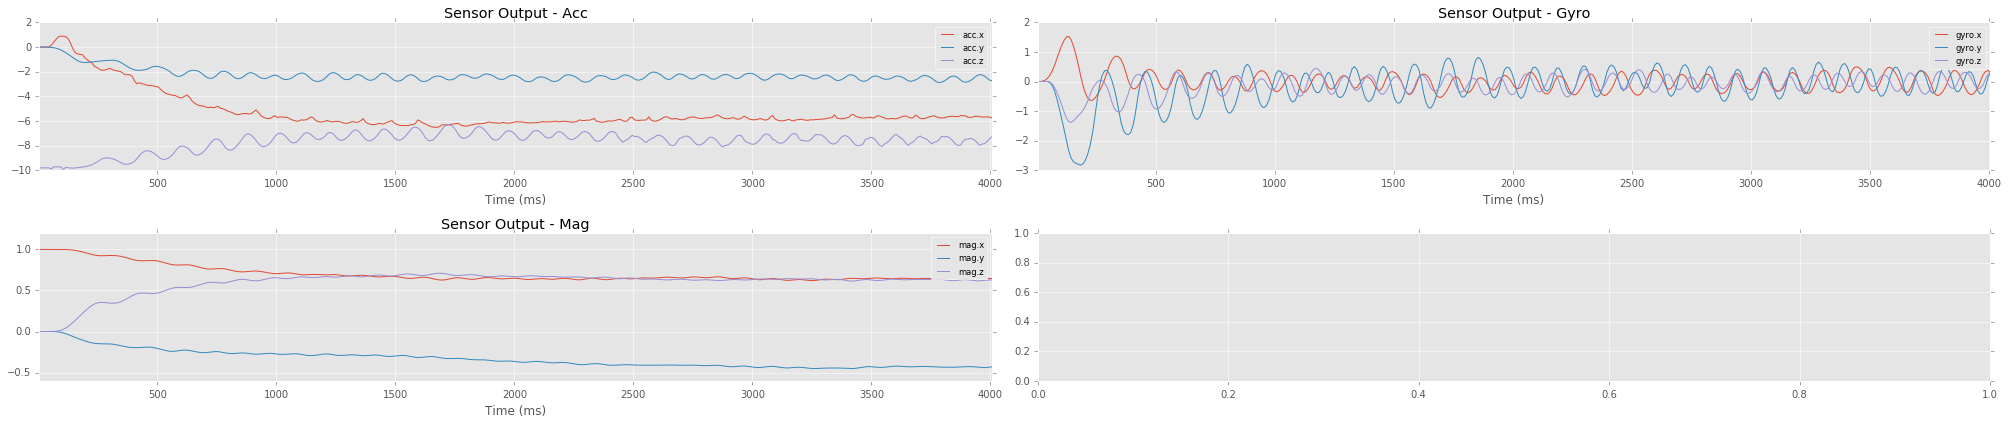

In [712]:
sensor_output = pd.read_csv(data_path + 'sensor_output.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
if plot_sensor:
    # Sensor Output
    display(sensor_output.head())
    fig, axes = plt.subplots(figsize=(28,6), nrows=2, ncols=2)
    ax_acc = sensor_output.loc[:, 'acc.x':'acc.z'].plot(ax=axes[0,0], title = 'Sensor Output - Acc').legend(loc=1, prop=fontP)
    ax_gyro = sensor_output.loc[:, 'gyro.x':'gyro.z'].plot(ax=axes[0,1], title = 'Sensor Output - Gyro').legend(loc=1, prop=fontP)
    ax_mag = sensor_output.loc[:, 'mag.x':'mag.z'].plot(ax=axes[1,0], title = 'Sensor Output - Mag').legend(loc=1, prop=fontP)
    fig.tight_layout()

,thrust,att.x,att.y,att.z,attq.w,attq.x,attq.y,attq.z
Time (ms),,,,,,,,
3965,0.5,0.314159,0.628319,0.628319,0.908311,0.047181,0.336249,0.244299
3975,0.5,0.314159,0.628319,0.628319,0.908311,0.047181,0.336249,0.244299
3985,0.5,0.314159,0.628319,0.628319,0.908311,0.047181,0.336249,0.244299
3995,0.5,0.314159,0.628319,0.628319,0.908311,0.047181,0.336249,0.244299
4005,0.5,0.314159,0.628319,0.628319,0.908311,0.047181,0.336249,0.244299


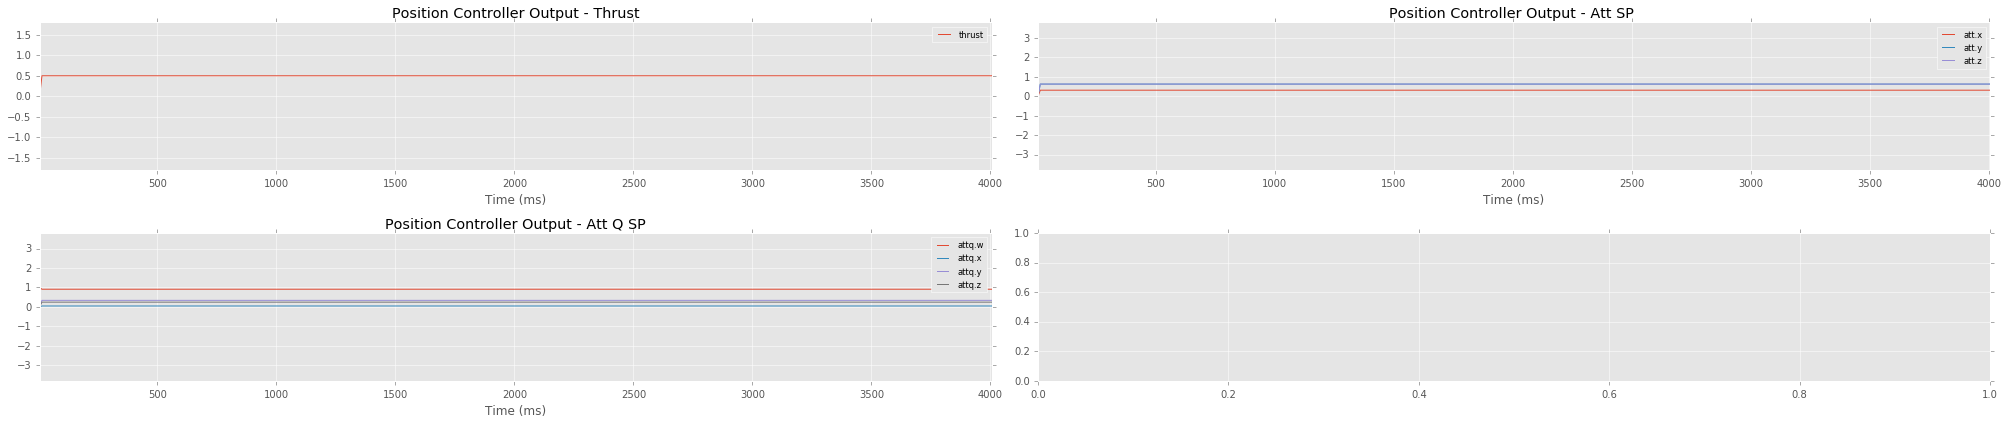

In [713]:
pcontroller_output = pd.read_csv(data_path + 'pcontroller_output.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
if plot_pos_control:
    # Position Control Output
    display(pcontroller_output.tail())
    fig, axes = plt.subplots(figsize=(28,6), nrows=2, ncols=2)
    ax_thrustsp = pcontroller_output.loc[:, 'thrust'].plot(ax=axes[0,0], title = 'Position Controller Output - Thrust', ylim=[-1.8,1.8]).legend(loc=1, prop=fontP)
    ax_attsp = pcontroller_output.loc[:, 'att.x':'att.z'].plot(ax=axes[0,1], title = 'Position Controller Output - Att SP ', ylim=[-3.8,3.8]).legend(loc=1, prop=fontP)
    ax_attqsp = pcontroller_output.loc[:, 'attq.w':'attq.z'].plot(ax=axes[1,0], title = 'Position Controller Output - Att Q SP', ylim=[-3.8,3.8]).legend(loc=1, prop=fontP)
    fig.tight_layout()

,thrust,rate_sp.x,rate_sp.y,rate_sp.z,tau_sp.x,tau_sp.y,tau_sp.z,m.1,m.2,m.3,m.4
Time (ms),,,,,,,,,,,
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,0.5,0.118515,0.685915,0.355342,0.014215,0.004870,0.002523,0.063094,0.890308,0.138342,0.148256
25,0.5,0.118499,0.685935,0.355302,0.014019,0.004870,0.002523,0.063125,0.890338,0.138311,0.148226
35,0.5,0.118407,0.686045,0.355075,0.013368,0.004871,0.002521,0.063226,0.890436,0.138206,0.148131
45,0.5,0.118138,0.686367,0.354412,0.012058,0.004873,0.002516,0.063419,0.890619,0.138003,0.147958


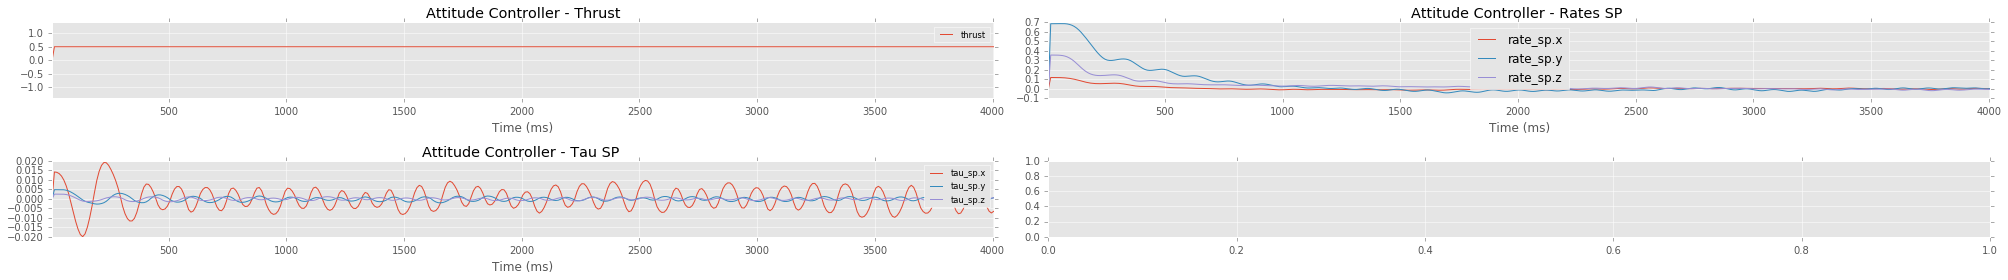

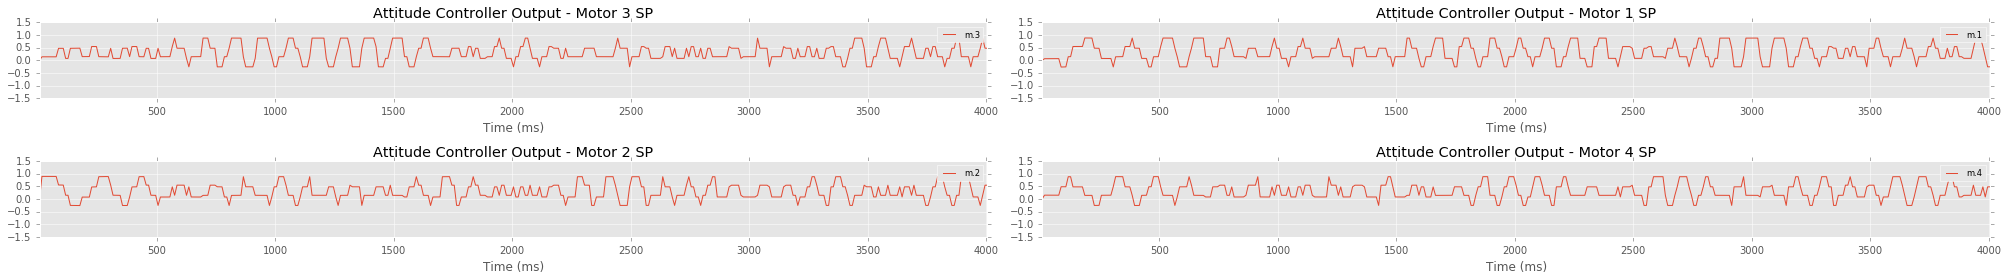

In [714]:
acontroller_output = pd.read_csv(data_path + 'acontroller_output.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
if plot_att_control:
    plot_skip=1
    # Attitude Control Output
    display(acontroller_output.head())
    fig, axes = plt.subplots(figsize=(28,4), nrows=2, ncols=2)
    ax_thrustsp = acontroller_output.loc[::plot_skip, 'thrust'].plot(ax=axes[0,0], title = 'Attitude Controller - Thrust', ylim=[-1.4,1.4]).legend(loc=1, prop=fontP)
    ax_ratessp = acontroller_output.loc[::plot_skip, 'rate_sp.x':'rate_sp.z'].plot(ax=axes[0,1], title = 'Attitude Controller - Rates SP ')
    ax_ratessp = acontroller_output.loc[::plot_skip, 'tau_sp.x':'tau_sp.z'].plot(ax=axes[1,0], title = 'Attitude Controller - Tau SP ')
    ax_ratessp.legend(loc=1, prop=fontP)
    fig.tight_layout()

    fig, axes = plt.subplots(figsize=(28,4), nrows=2, ncols=2)
    ax_motsp = acontroller_output.loc[::plot_skip, 'm.3'].plot(ax=axes[0,0], title = 'Attitude Controller Output - Motor 3 SP', ylim=[-1.5,1.5]).legend(loc=1, prop=fontP)
    ax_motsp = acontroller_output.loc[::plot_skip, 'm.1'].plot(ax=axes[0,1], title = 'Attitude Controller Output - Motor 1 SP', ylim=[-1.5,1.5]).legend(loc=1, prop=fontP)
    ax_motsp = acontroller_output.loc[::plot_skip, 'm.2'].plot(ax=axes[1,0], title = 'Attitude Controller Output - Motor 2 SP', ylim=[-1.5,1.5]).legend(loc=1, prop=fontP)
    ax_motsp = acontroller_output.loc[::plot_skip, 'm.4'].plot(ax=axes[1,1], title = 'Attitude Controller Output - Motor 4 SP', ylim=[-1.5,1.5]).legend(loc=1, prop=fontP)
    fig.tight_layout()

,att.x,att.y,att.z
Time (ms),,,
3965,-2.709031,-1.844671,3.176139
3975,-2.707331,-1.840501,3.173339
3985,-2.708161,-1.836431,3.173579
3995,-2.711601,-1.833991,3.177349
4005,-2.716961,-1.833801,3.183459


,rate_sp.x,rate_sp.y,rate_sp.z
Time (ms),,,
3965,-0.005332,-0.425004,-0.224432
3975,-0.207836,-0.391036,-0.129837
3985,-0.327093,-0.205889,0.054243
3995,-0.373154,0.082572,0.222778
4005,-0.326954,0.298052,0.284146


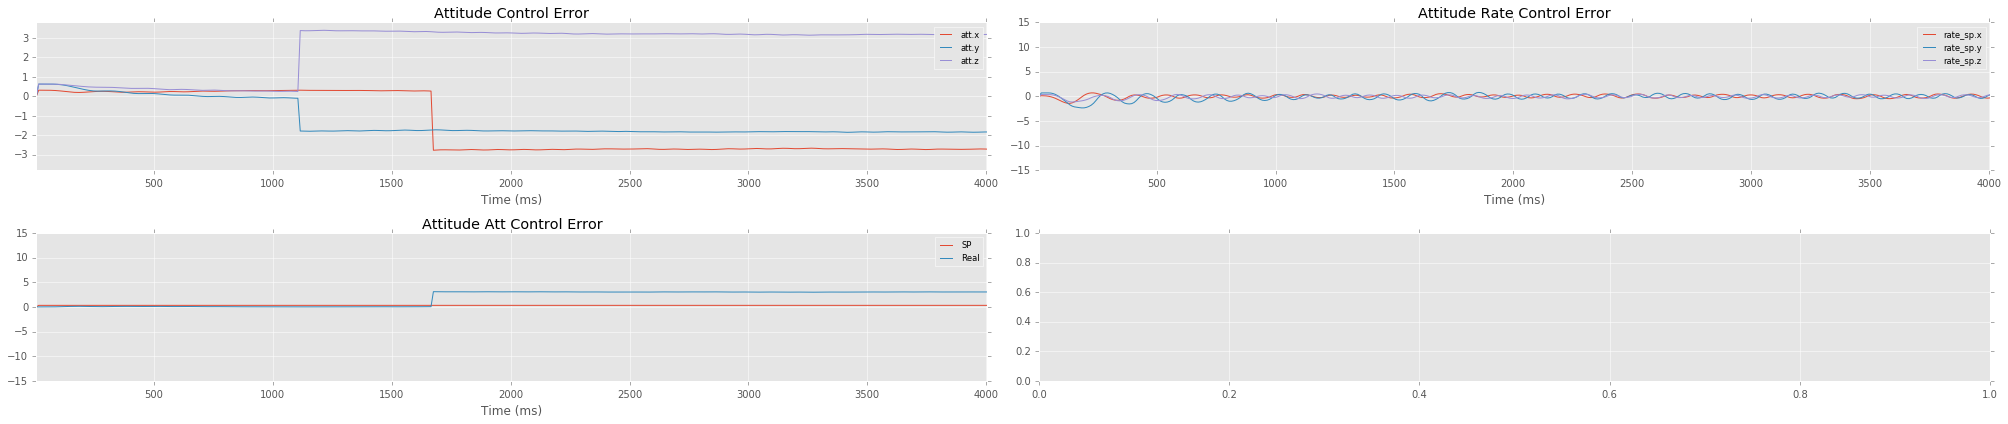

In [715]:
# Error State
if plot_errors:
    plot_skip=1
    attitude_error = pcontroller_output.loc[:, 'att.x':'att.z'] - (dynamics_data.loc[:,'att.x':'att.z'])
    display(attitude_error.tail())
    rate_error = acontroller_output.loc[:, 'rate_sp.x':'rate_sp.z'] - (dynamics_data.loc[:,'v.r':'v.yaw'].values)
    display(rate_error.tail())
    fig, axes = plt.subplots(figsize=(28,6), nrows=2, ncols=2)
    ax_error_attitude = attitude_error.loc[::plot_skip, 'att.x':'att.z'].plot(ax=axes[0,0], title = 'Attitude Control Error', ylim=[-3.8,3.8])
    ax_error_attitude.legend(loc=1, prop=fontP)
    ax_rate_error = rate_error.loc[::plot_skip, 'rate_sp.x':'rate_sp.z'].plot(ax=axes[0,1], title = 'Attitude Rate Control Error', ylim=[-15,15]).legend(loc=1, prop=fontP)
    ax_att = pcontroller_output.loc[:, 'att.x'].plot(ax=axes[1,0], title = 'Attitude Att Control Error', label='SP',ylim=[-15,15])
    ax_att = dynamics_data.loc[:, 'att.x'].plot(ax=axes[1,0], title = 'Attitude Att Control Error', label='Real',ylim=[-15,15]).legend(loc=1, prop=fontP)
    fig.tight_layout()
    
    #Compare quaternions then cover the differernce 

In [716]:
line = ax_error_attitude.lines[0]
